# EAE 127 Project 2 Supplement - Potential Flow

### Problem 1, Superposition of Flows 

&nbsp; &nbsp; &nbsp; &nbsp; For this project, we will begin to work with potential flow methods for aerodynamic analysis. Potential flow exists when Velocity = $\Delta \phi$. This means that the flow is irrotational, or the curl of the velocity field is zero. Additionally, in incompressible flow $\Delta * V$ = 0. Since Velocity = $\Delta \phi$ we can rewrite the incompressible flow condition as $\Delta^2 \phi = 0$, or the Laplace Equation. This equation represents the continuity equation for potential flow. This enables **the superposition principle** for potential flows. Any simple flows that are solutions for the Laplace equation also makes the sum of those flows solutions. In other words, if $\phi_{1}$ and $\phi_{2}$ are potential flow solutions, $\phi_{3}$ = $\phi_{1}$ + $\phi_{2}$ is also a potential flow solution. 

&nbsp; &nbsp; &nbsp; &nbsp; In order to get started with our potential flow analysis, we should talk a little about the background of what is happening in our analysis/code. Our potential flow methods for this project are 2 dimensional in the X and Y direction. If we assume a 2D control volume or a 2D section of our flow, we can start by splitting this control volume into discreet sections or a grid as visualized below. 

<img src="p2 grid.png" alt="Grid / Discretized Flow Section" />  <img src="p2 values.png" alt="Grid / Discretized Flow Section" /> 


&nbsp; &nbsp; &nbsp; &nbsp; Each section of this grid has two components of velocity, (one in the horizontal direction **u**, one in the vertical direction **v**), while the entire grid has a specific stream function $\psi$. The velocities u and v, as well as the stream function will vary for each different section of the grid. When we first create this grid, the values will be zero at each point. When we start to add elementary potential flows to our grid, these values will change based on the type of flow, location of those flows, and the strength of those flows. We start by setting up our grid and choosing an appropriate number of points/sections. We will call this a ***meshgrid***. The simplest way to set this up is by using the numpy function meshgrid().

### Grid Creation

In [74]:
import numpy as np
import matplotlib.pyplot as plt

N = 250                                         # Number of points/sections to use in each direction for our flow
x_start, x_end = -5.0, 5.0                      # Boundaries of our flow in the x direction 
y_start, y_end = -1.5, 1.5                      # Boundaries of our flow in the y direction 

# Note, you can adjust the start and end points later to get the best image of your plot / flow

x = np.linspace(x_start, x_end, N)              # 1D array of x points
y = np.linspace(y_start, y_end, N)              # 1D array of y points
X, Y = np.meshgrid(x, y)                        # 2D Meshgrid 

&nbsp; &nbsp; &nbsp; &nbsp; At this point, we have created our empty meshgrid. A meshgrid is a bit like an array but is used specifically for scalar and vector fields. Remember that at this point, the velocity and stream functions at every point in this meshgrid are zero as we haven't begun to define them yet. Our next step is to start introducing our potential flows to our grid system. For every elementary potential flow solution we would like to introduce to our meshgrid, we need to define the horizontal velocity u, vertical velocity v and the stream function $\psi$ for that potential flow.  Lets try this for a ***uniform freestream flow***. For a uniform flow traveling from left to right at a constant velocity, we create the potential flow as follows.

### Freestream Flow


In [75]:
u_inf = 1.2                                    # Freestream flow velocity

# Computing the freestream velocity field
u_freestream = u_inf * np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)

# Computing the stream-function
psi_freestream = u_inf * Y

&nbsp; &nbsp; &nbsp; &nbsp; You should be able to qualitatively describe what is happening in the above code. u_freestream and v_freestream are 2D matrices, each with 250 by 250 points. Since we want a flow that is moving from left to right, we define all of the points in our grid to have the same horizontal velocity u_freestream and define all of the vertical velocity v_freestream to be 0. We then define the stream function. To visualize whats happening, we can quickly plot our flow section/control volume. 

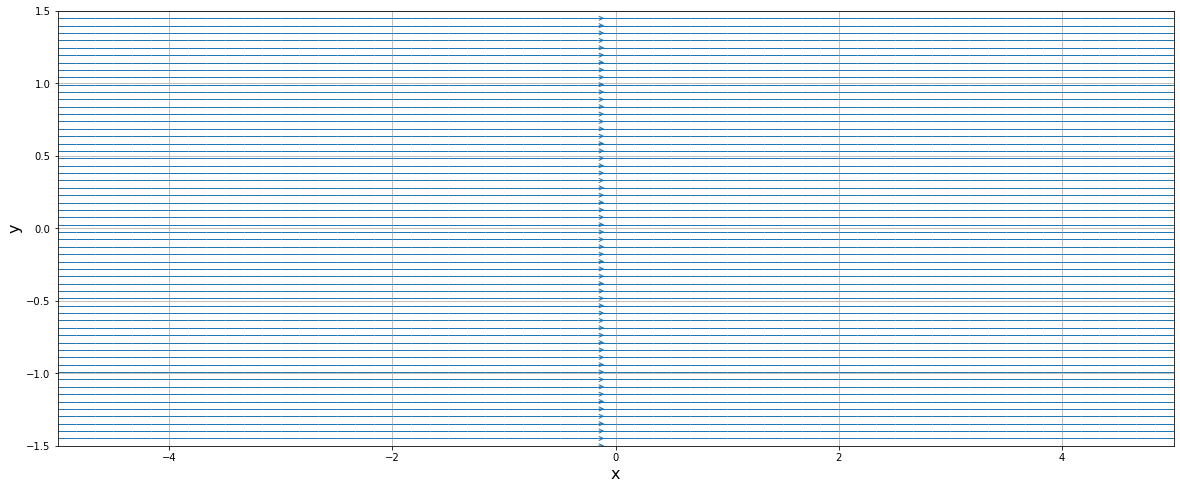

In [76]:
width = 20
height = 8

# Here we set up standard plotting functions. 
plt.figure(figsize=(width, height))
plt.grid(True)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)

# Streamplot is a new plotting function that we will use to display the streamlines.
# The streamlines are generated based on the values of u_freestream and v_freestream. 
plt.streamplot(X, Y, u_freestream, v_freestream, density=2, linewidth=1, arrowsize=1, arrowstyle='->') 

plt.show()

&nbsp; &nbsp; &nbsp; &nbsp; The above plot is fairly simple since the flow is just moving from left to right. This flow will start to behave differently once we add more potential flows. The next elementary potential flows we add will be ***sources*** and ***sinks***. Defining these flows is a little more complex and so we will need to define some custom functions for them. 

One thing to notice in the above code is there is only one new plotting function. plt.streamplot(). The only inputs we used were u_freestream (or the vector for our u velocity) and v_freestream (or the vector for our v velocity). We haven't used our stream function $\psi$ for plotting yet. We will use this for plotting later.

### Source and Sink Flow
&nbsp; &nbsp; &nbsp; &nbsp; A source and a sink are essentially the same potential flow solution, but sources have a positive strength and sinks have a negative strength. Within out potential flow models, we choose a location to place our source/sink and we determine the effect on the rest of the grid based on the location and strength of the source/sink. This may make a little more sense by referencing the following equations:


$$u_{source}(x,y) = \frac{\sigma}{2 \pi} \frac{x - x_{source}}{ (x - x_{source})^2 + (y - y_{source})^2}$$


$$v_{source}(x,y) = \frac{\sigma}{2 \pi} \frac{y - y_{source}}{ (x - x_{source})^2 + (y - y_{source})^2}$$


$$\psi_{source}(x,y) = \frac{\sigma}{2 \pi} (\frac{y - y_{source}}{x - x_{source}})$$

$\sigma$ is the strength of the source or sink. x and y are the locations within the meshgrid and $x_{source}$ and $y_{source}$ are the locations of the source or sink. We will need a function for the velocity components and the stream function. We can define these functions based on the above equations. Lets call these functions get_velocity() and get_stream_function(). 

> You will need to write in the equations above for the following functions. You won't need to change the inputs or the return functions. Only the equations for u, v and psi within the functions need to be written. 

> In the above equations the variables are as follows:
> - $ u_{source}(x,y) $ is the horizontal velocity defined at every point. (We need to solve for this)
> - $ v_{source}(x,y) $ is the vertical velocity defined at every point. (We need to solve for this)
> - $\sigma$ is the **STRENGTH** of the source/sink. Positive strength = Source, Negative strength = Sink. (We define this)
> - $x_{source}$  and  $y_{source}$ are the location where you want the source or sink to be placed. (We define this)
> - x and y are the meshgrid values that we defined earlier in our code. (There are X and Y in the below function, which are defined by our control volume)
> - For the stream function, $\psi_{source}(x,y)$, use the function numpy.arctan2 to divide $y - y_{source}$  by  $x - x_{source}$

In [77]:
def get_velocity(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    # Here, input the equation for u_source from the equations above
    u = strength / (2 * np.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)

    # Here, input the equation for v_source from the equations above
    v = strength / (2 * np.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    
    return u, v


def get_stream_function(strength, xs, ys, X, Y):
    """
    Returns the stream-function generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    # Here, input the equation for psi from the equations above
    psi = strength / (2 * np.pi) * np.arctan2((Y - ys), (X - xs))
    
    return psi



### Superposition and Adding Source / Sinks

&nbsp; &nbsp; &nbsp; &nbsp; Once the above functions are defined, they can easily be used to create a source or sink at certain points within the meshgrid. For every source or sink that we would like to create we need to run get_velocity() and get_stream_function in order to determine its contribution to the overall flow behavior. Based on the above functions, we will need a value for strength, the x and y coordinates for the location of our source/sink and the meshgrid components, X and Y. 

> Here we are going to define the inputs we need to place a source or a sink inside of our freestream flow.
> - We need to define the strength of our souce/sink
> - We need to define the x location/coordinate where we would like to place our singularity
> - We need to define the y location/coordinate where we would like to place our singularity 

In [78]:
source_strength =  2.5                      # Strength of source singularity
x_source = -0.1                             # X coordinate of source singularity
y_source =  0.0                             # Y coordinate of source singularity        

# Here, we use some simple code to set up information about our source. 
# Next we use the functions above to create the source and sink contributions to u, v and psi. 

u_source, v_source = get_velocity(source_strength, x_source, y_source, X, Y)
psi_source = get_stream_function(source_strength, x_source, y_source, X, Y)

sink_strength = -2.5
x_sink = 0.10

u_sink, v_sink = get_velocity(sink_strength, x_sink, y_source, X, Y)
psi_sink = get_stream_function(sink_strength, x_sink, y_source, X, Y)

# As we can see, the inputs for both functions are the same.


&nbsp; &nbsp; &nbsp; &nbsp; Now that we've run the necessary functions, the horizontal velocity and vertical velocity due to the source we've placed is stored in the variables u_source and v_source. Since u source and v_source are N x N vectors, this means we have a horizontal velocity and vertical velocity defined at every point in the grid. The same is true for our variable psi_source which keeps track of the value of the stream function at every point. We can plot the effect of the source using the same plotting method we used above. Lets try plotting only the source without the freestream flow. 

> Here, I recommend you try adjusting the source strength (vary between a positive and a negative value to change between a source and a sink), as well as change the magnitude of the  source strength. You should also adjust the x_source and y_source variables in order to see how the source/sink moves. These changes can be seen in the next portion of our code where we begin to plot our results. 

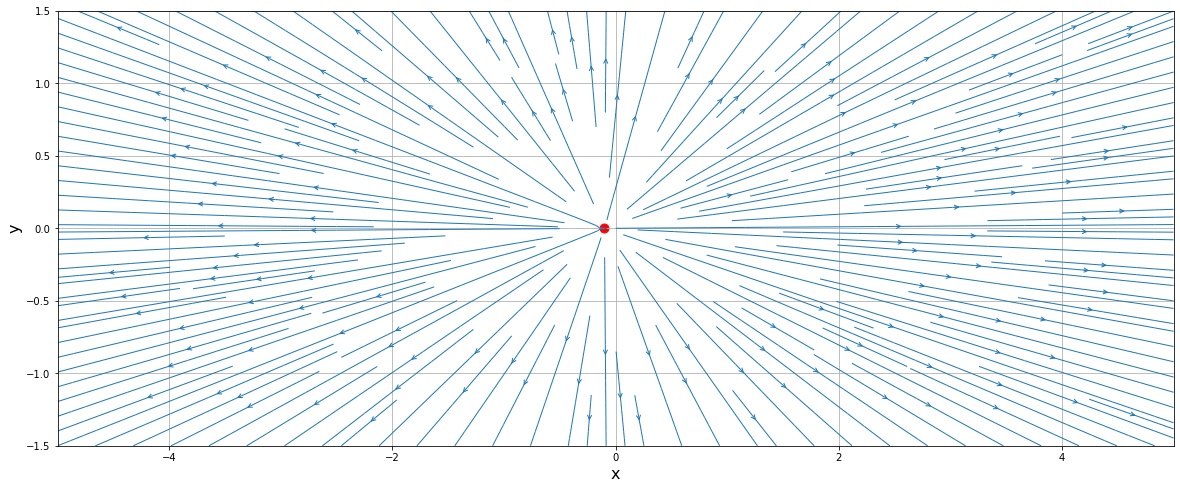

In [79]:
width = 20
height = 8

# Here we set up standard plotting functions. 
plt.figure(figsize=(width, height))
plt.grid(True)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)

# Streamplot is a new plotting function that we will use to display the streamlines. 
# Notice that when plotting the freestream flow, we used u_freestream and v_freestream.
# Now we change these values to u_source and v_source. 
plt.streamplot(X, Y, u_source, v_source, density=2, linewidth=1, arrowsize=1, arrowstyle='->')

# We should also add a point to the plot to represent the location of the source. 
# plt.scatter is not specific to our potential flow methods, it is just used to plot a singular point
plt.scatter(x_source, y_source, color = 'red', s = 80, marker ='o')
plt.show()

&nbsp; &nbsp; &nbsp; &nbsp; At this point you should have a general understanding of the functions we will use for Project 2. You can also vary the strength and location of the source we have created above in order to see how it affects the nearby flow. You can also make the strength value negative to see how the flow behaves with a sink. 

Thus far, we've created two individual plots, one that is just the freestream flow, for this, we only used u_freestream, v_freestream and psi_freestream. Then we created just a source flow, for this we only used u_source, v_source and psi_source. The two individual plots are interesting on their own, but we would like to combine these flows in order to arrive at a more complicated solution. 

Our next step is to use the superposition principle for elementary flows. Remember at the beginning of the project we discussed that simple elementary flows can be simply combined to acquire more complex flows. Now that we have simulated a freestream flow and a source flow, we can combine them. The method to do this is displayed below. Remember that we have the velocity and stream functions for the freestream flow stored in u_freestream, v_freestream and psi_freestream. You can (and should) use your own variable names. 

> Combining elementary flows can be done fairly simply, since we are combining a freestream and a source, we need to combine or add the freestream variables to the source variables. We will also take a look at using the stream functon for plotting (thus far we have only used u and v). Now that we are adding together our elementary flows, we would like to use plt.contour() to help us visualize our flows. 

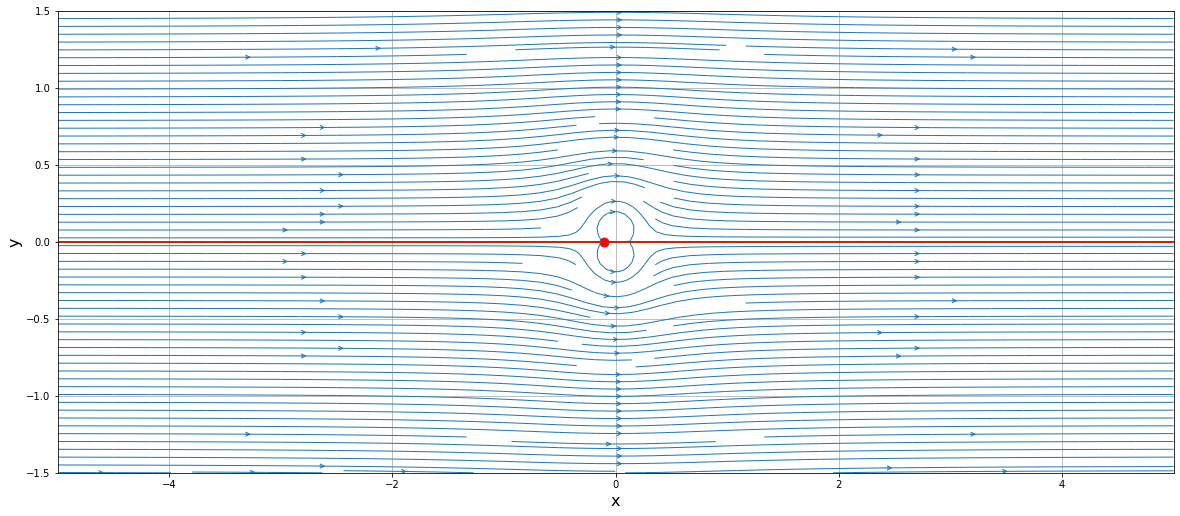

In [80]:
# Superposition:
U_Total = u_freestream + u_source+u_sink
V_Total = v_freestream + v_source+v_sink
psi_Total = psi_freestream + psi_source+v_source

# The "total" variables now account for the contributions to the flow from both the source and the freestream. 
# We can now plot this the same way we have above. 


width = 20
height = 8.5
# Setting up standard plotting functions once again
plt.figure(figsize=(width, height))

plt.grid(True)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)

# Streamplot is a new plotting function that we will use to display the streamlines. 
# Notice that when plotting the freestream flow, now we should use U_Total and V_Total 
plt.streamplot(X, Y, U_Total, V_Total, density=2, linewidth=1, arrowsize=1, arrowstyle='->')

# A new plotting function we will use is contour(), this creates a contour of the flow. 
# We call this contour the *dividing streamline*. This requires an accurate stream function psi.
plt.contour(X, Y, psi_Total, levels=[0], colors='#CD2305', linewidths=2, linestyles='solid');

# We should also a point to the plot to represent the location of the source. 
# Remember that we should do this for every source and sink that we add, and we should make sure to 
# differentiate between sources and sinks when we have both. 
plt.scatter(x_source, y_source, color = 'red', s = 80, marker ='o')
plt.show()


# You can ignore this part for now. Saving these variables to use later on. 
u_demo = U_Total
v_demo = V_Total
psi_demo = psi_Total 

### Results 
&nbsp; &nbsp; &nbsp; &nbsp; Here, we should take a look at what the result of our superposition plot is. We have a source (which pushes flow out from its singularity) in freestream flow traveling from left to right. The strength of the source is not strong enough to completely stop the freestream flow, but there is a stagnation point directly to the left of our source. You should ask yourself if this flow makes sense to you based on the two flows that we've combined. Additionally, we should also examine the contour or **dividing streamline** that is represented in red. 

The dividing streamline in potential flow analysis can be thought of as a "solid" boundary. In other words, there are no flows that cross this boundary in our potential flow analysis. Using this fact, we can attempt to create realistic/complex situations using elementary flows. The above plot is the **source in freestream flow** that is asked for in problem 1. You will need to individually add the necessary plotting elements such as the dividing streamline diameter, and the stagnation point location as well as a plot legend. You will also need to adjust the freestream velocity and source strength. The other two plots **sink in freestream flow** and **doublet flow** are left to you to create and include in your report. The superposition of the flows should be performed in the same method as shown above. 

> To complete Problem 1, 
> - Create the above plot and properly label the plot according to the problem statement
> - Create a second plot that uses a sink instead of a source and uses the same singularity location
> - Create a third plot that uses a source and sink that are a set distance from each other((1, 0) for the source, (-1, 0) for the sink)
> - Create a fourth plot for a doublet flow, (a freestream, an upstream source and a downstream sink)





In [81]:
def get_velocity_doublet(Kappa, xs, ys, X, Y):
    """
    Returns the velocity field generated by a source/sink.
    
    Parameters
    ----------
    Kappa: float
        Strength of the doublet
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    # Here, input the equation for u_source from the equations above
    u = Kappa  * (((X - xs)**2 - (Y - ys)**2))/ (2*np.pi *((X - xs)**2 + (Y - ys)**2)**2)

    # Here, input the equation for v_source from the equations above
    v = Kappa  * (2*(X - xs)* (Y - ys))/ (2*np.pi *((X - xs)**2 + (Y - ys)**2)**2)
    
    return u, v

def get_stream_function_doublet(Kappa, xs, ys, X, Y):
    """
    Returns the stream-function generated by a source/sink.
    
    Parameters
    ----------
    Kappa: float
        Strength of the doublet.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    # Here, input the equation for psi from the equations above
    psi = Kappa * ((Y - ys)) / (2 * np.pi) * ((X - xs)**2 + (Y - ys)**2)
    
    return psi

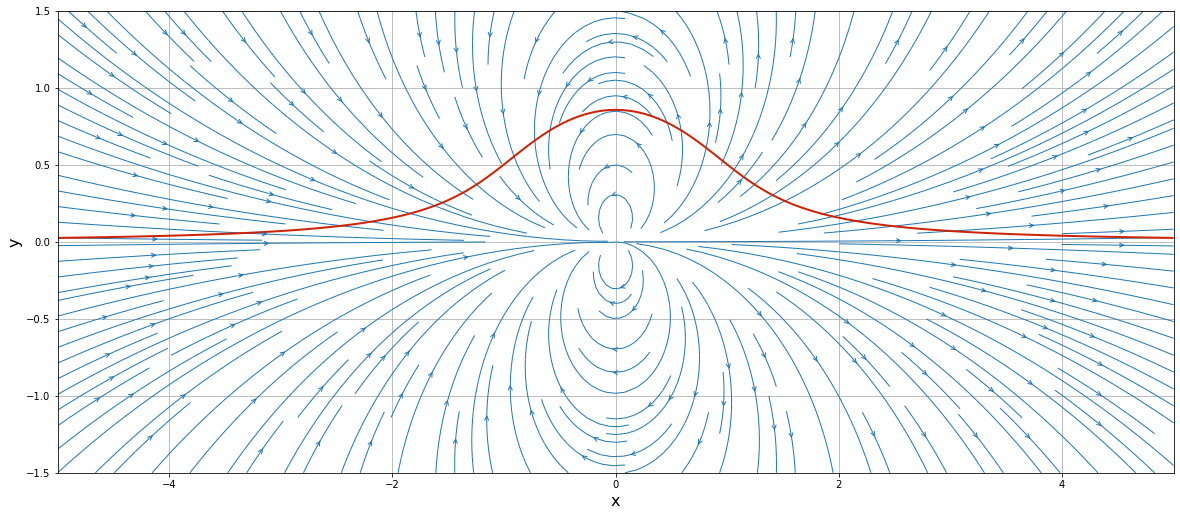

In [88]:
Kappa = 500000
x_loc = 0.0
y_loc = 0.0

u_doub, v_doub =  get_velocity_doublet(Kappa, x_loc, y_loc, X, Y)
psi_doub =  get_stream_function_doublet(Kappa, x_loc, y_loc, X, Y)

U_Total = u_doub
V_Total = v_doub
psi_Total = psi_doub

# The "total" variables now account for the contributions to the flow from both the source and the freestream. 
# We can now plot this the same way we have above. 


width = 20
height = 8.5
# Setting up standard plotting functions once again
plt.figure(figsize=(width, height))

plt.grid(True)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)

# Streamplot is a new plotting function that we will use to display the streamlines. 
# Notice that when plotting the freestream flow, now we should use U_Total and V_Total 
plt.streamplot(X, Y, U_Total, V_Total, density=2, linewidth=1, arrowsize=1, arrowstyle='->')

# A new plotting function we will use is contour(), this creates a contour of the flow. 
# We call this contour the *dividing streamline*. This requires an accurate stream function psi.
plt.contour(X, Y, psi_Total, levels=[50000.0], colors='#CD2305', linewidths=2, linestyles='solid');

# We should also a point to the plot to represent the location of the source. 
# Remember that we should do this for every source and sink that we add, and we should make sure to 
# differentiate between sources and sinks when we have both. 
plt.show()

# Problem 2 and Problem 3 - More Complex Superpositions

&nbsp; &nbsp; &nbsp; &nbsp; At this point you should have an understanding of how to create different elementary potential flows and to superimpose them. In problem 1 we are combining no more than 2 - 3 elementary flows. For Problem 2 and Problem 3, we will need to adjust our code in order to create larger numbers of sources and sinks more quickly. The basic creation of these potential flows is fairly simple, we define the locations and strengths of our sources and sinks and then use the functions get_velocity() and get_stream_function() in order to determine the contribution to the potential flow velocity and stream function. Once we have created each of these solutions, we simply add them together to accomplish superposition. This method works fairly well for small numbers of potential flow solutions. Lets take a look at how we would start creating these potential flow solutions for Problem 2, which requires a minimum of 12 potential flow solutions to be combined. 

In [83]:
# Lets start by resetting/clearing our total/superposition variables.
# Setting these variables to 0 makes it so we are free to use them again.
U_Total = 0
V_Total = 0
psi_Total = 0

# CREATING SOURCE 1
strength1 = 0.5             # Source 1 (or sink) Strength
x_source1 = 1               # X coordinate of Source 1
y_source1 = 0.0             # Y coordinate of Source 1

# Next we would run the necessary functions to determine the CONTRIBUTION from this source. 
u1, v1 = get_velocity(strength1, x_source1, y_source1, X, Y)
psi1 = get_stream_function(strength1, x_source1, y_source1, X, Y)

# Next we should add these contributions to our superposition variables. 
# You could also leave this step until last and add up every contribution at once. 
U_Total = U_Total + u1
V_Total = V_Total + v1
psi_Total = psi_Total + psi1

# Now that we've added the first source lets move onto the second one. 
# As you can see the process is exactly the same, but the inputs to get_velocity() and get_stream_function() are 
# slightly different to account for the new source. Notice that the variables have changed as well. 

# CREATING SOURCE 2
strength2 = 1.5             # Source 2 (or sink) Strength
x_source2 = 2.25            # X coordinate of Source 1
y_source2 = 0.0             # Y coordinate of Source 1

# Once again we use get_velocity(), and get_stream_function() in order to determine the CONTRIBUTION from source 2
u2, v2 = get_velocity(strength2, x_source2, y_source2, X, Y)
psi2 = get_stream_function(strength2, x_source2, y_source2, X, Y)

# THEN we add the contribution from u2, v2 and psi2 to our total values.
U_Total = U_Total + u2
V_Total = V_Total + v2
psi_Total = psi_Total + psi2

# Now, we should have the superposition of source 1 and source 2 stored in our potential flow variables U_Total, V_Total and psi_Total.
# So far this is essentially the same as 


&nbsp; &nbsp; &nbsp; &nbsp; The above code works fine for creating a potential flow source or sink one at a time. You could follow the above process to create as many sources and sinks as you need, and as long as you were adding up the contribution from each, your code would work just fine. However, Problem 2 requires you to use a minimum of 12 sources and sinks to approximate the geometry of an airfoil. This process would become pretty tedious if we were to rewrite the above chunk of code 10 times. **Notice that for each chunk of the code, the strength, x and y coordinates, and the variables(u1 vs u2, v1 vs v2, psi1 vs psi2) will change for each source**. Additionally having to modify each of these values one at a time would prove extremely tedious as well. In problem 3, where you are expected to use up to 101 sources and sinks this method becomes insuitable. How can we simplify this process so that we do not need to write each source and sink one by one? 

The simplest answer is using a for loop. Since the code is consistently the same from source to source we can use a for loop to iterate through the different sources and sinks. Lets see how we might do this. 

The above code starts by defining the strength of a source or sink, and the x and y coordinates of its location. Rather than do this one at a time, we can create an array for ALL of the sources and sinks we would like to use. For problem 2, we can define an array called Strengths. Each element of this array will correspond to the strength of a different source or sink. Strength[0] will correspond to the first source, Strength[1] will correspond to the second source and so on and so forth. The same reasoning can be applied to the x coordinates and y coordinates of the sources. 

In [84]:
# Lets start by resetting/clearing our total/superposition variables.
U_Total = 0
V_Total = 0
psi_Total = 0

Strengths = np.array(1.0, -2.25, 3.5, -5)
x_loc = np.array(1.0, 2.0, 2.5, 4.5)
y_loc = np.array(0, 0, 0, 0)

# The above arrays define the data/definitions to create 4 different sources/sinks. 
# Lets see how we can write our for loop in order to loop through this data.

n = len(Strengths)                  # n is the number of sources/sinks we would like to create. 

# As a reminder, a for loop repeats the code inside a certain number of times, in this case, we repeat the code and change the value i on each repetition.

for i in range(0,n-1):              # This line basically reads for all values of i between 0 and n (in this case 4)
    u, v =                          # Here you should input the necessary functions 
    psi =                           # (these functions need to vary with each iteration of our loop, i.e use the iteration variable i )
    
    U_Total =                       # Here, you want to add up the contribution on each iteration of the loop. 
                                    # The value of U_Total needs to change each time the loop is run.

    V_Total =                       # To accomplish this, we can use U_Total = U_Total + u or you can use the recursion operator U_Total += u.
    psi_Total =                     # This takes the previous value of U_Total (or V_Total/psi_Total) and adds the 
                                    # value of u, v and psi (which changes on each loop iteration)

# You can plot the above result using the plotting procedures we've developed previously in the supplement. 
# I highly recommend you attempt this while also plotting the airfoil geometry used in Problem 2.

SyntaxError: invalid syntax (<ipython-input-84-8523fbf6aea3>, line 18)

&nbsp; &nbsp; &nbsp; &nbsp; Completion of the above code is left to you as part of Problem 2 and Problem 3. Remember that you should use the iteration variable we've defined as i to change the value of Strengths, x_loc and y_loc on each loop iteration. This will ensure that you are calculating the contribution of a different source/sink on each loop. For Problem 2 you will need to use 10 total sources and sinks and the sum of your Strengths array will need to be zero. This guarantees that your dividing streamline will be a closed loop. Additionally, make sure you are creating 3 different approximations of your airfoil (each approximation should improve your error). You can plot your airfoil geometry on the same plot as your potential flow solutions, and adjust the above arrays as necessary until your dividing streamline approximation is satisfactory. 

In Problem 3, you can solve the problem similarly as above, but since you are using a large number of sources and sinks, you will need to be a little creative with how you are defining the array for Strengths, x_loc and y_loc.

### Problem 2 Dividing Streamline Approximation:

Use the below code to extract the coordinates of your dividing streamline. Running the below code will store the coordinates in the variables x_div and y_div. You'll then compare these coordinates to the actual airfoil coordinates. 



In [ ]:
# In order to extract the dividing streamline, we can use the following function. 

def collect_contour(X, Y, psi, xs = 0, xe = 3, af = 1):
    if af == 1:
        levels = 0

    plt.figure()
    CS = plt.contour(X, Y, psi, levels=[-source_strength / 2, source_strength / 2], colors='#CD2305', linewidths=2, linestyles='solid')
    P = CS.collections[0].get_paths()[0]
    plt.close()

    V = P.vertices
    x_coord = np.array(V[:,0])
    y_coord = np.array(V[:,1])


    # Now we would like to remove the coordinates that aren't relevant. 
    # Since we are dealing with an airfoil, lets assume the airfoil begins at (0,0) for the leading edge.
    # You may need to adjust the valuye of xe depending on 3/4s of the chord. 
    p = len(x_coord)
    
    for i in range(p-1, 0, -1):
        if (x_coord[i] < xs) or (x_coord[i] > xe):
            x_coord = np.delete(x_coord, i)
            y_coord = np.delete(y_coord, i)
    
    y_coord = abs(y_coord)
    return x_coord, y_coord

# The above function will give the coordinates for your dividing streamline. 
# From here you should interpolate these coordinates to a new vector for x and then use the formula provided
# In the problem statement to determine the error for each approximation. 
# The only inputs you need will be X, Y, and the stream function for you airfoil approximation. You should change 
# levels to be equal to 0 in the plt.contour() function within the collect_contour function.

x_div, y_div = collect_contour(X, Y, psi_demo)

The final steps for problem 2 after obtaining the above dividing streamline for each approximation are:

&nbsp; &nbsp; &nbsp; &nbsp; 1). Interpolate to a new variable of x points. (Use more points that the x_div variable for better accuracy, but the same number of points as your airfoil coordinates) 

&nbsp; &nbsp; &nbsp; &nbsp; 2). Perform the error approximation calculation for each of your 3 trials 

&nbsp; &nbsp; &nbsp; &nbsp; 3). Determine the value of u and v along your closest approximation and compute the pressure coefficient  